In [47]:
import os
import cv2
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from src.utils.getit import get_project_root
from image_slicer import slice
import random

PROJECT_DIR = get_project_root()
DATA_DIR = os.path.join(PROJECT_DIR,"data/external/massachusetts/")
MASK_DIR = os.path.join(DATA_DIR,"raw/training/groundtruth/")
IMAGE_DIR = os.path.join(DATA_DIR,"raw/training/images/")
SLICED_MASK_DIR= os.path.join(DATA_DIR,"interm/groundtruth/")
SLICED_IMAGE_DIR= os.path.join(DATA_DIR,"interm/images/")
PROCESSED_MASK_DIR= os.path.join(DATA_DIR,"processed/groundtruth/")
PROCESSED_IMAGE_DIR= os.path.join(DATA_DIR,"processed/images/")
RAW_DATA= os.path.join(PROJECT_DIR,"data/raw/training/groundtruth/")

In [39]:
#Raw 56 15 pix 2 roads=7m with 400 pix             =>>we see 187m in one image
#Raw external 2129 8 pix 2 roads=7m with 1024pix  =>>we see 1212m in one image 

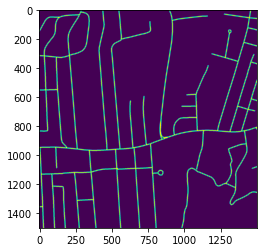

In [76]:
#Read all file names from ./data/external/raw
mask_filenames = list(sorted(os.listdir(MASK_DIR)))
image_filenames=list(sorted(os.listdir(IMAGE_DIR)))
mask = cv2.imread(os.path.join(MASK_DIR, mask_filenames[22]), cv2.IMREAD_UNCHANGED,
)
plt.imshow(mask)

In [77]:
mask.mean()

15.559873333333334

In [78]:
hf_images=[]
hf_masks = []
for mask_fn,image_fn in tqdm(zip(mask_filenames,image_filenames),total=len(mask_filenames)):
    mask = cv2.imread(os.path.join(MASK_DIR, mask_fn), cv2.IMREAD_UNCHANGED)
    image= cv2.imread(os.path.join(IMAGE_DIR, image_fn), cv2.IMREAD_UNCHANGED)
    if np.mean(mask)>15 and len(image.flatten()[image.flatten()==255])<1000:
        hf_masks.append(mask_fn)
        hf_images.append(image_fn)

100%|██████████████████████████████████████████████████████████████████████████████| 1171/1171 [00:51<00:00, 22.67it/s]


In [79]:
len(hf_masks)

306

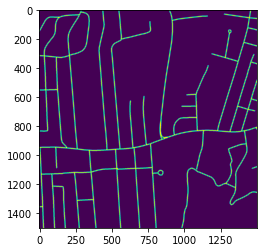

In [80]:
mask = cv2.imread(os.path.join(MASK_DIR, hf_masks[random.randint(0,100)]), cv2.IMREAD_UNCHANGED,
)
plt.imshow(mask)

In [82]:
number=36
for mask_fn,image_fn in tqdm(zip(hf_masks,hf_images)):
    slice(filename=IMAGE_DIR+image_fn,
          number_tiles=number,
          save=True,
          save_dir=SLICED_IMAGE_DIR)
    slice(filename=MASK_DIR+mask_fn,
          number_tiles=number,
          save=True,
          save_dir=SLICED_MASK_DIR)

306it [02:25,  2.11it/s]


In [83]:
#Read all file names from ./data/external/raw
sliced_mask_filenames = list(sorted(os.listdir(SLICED_MASK_DIR)))
sliced_image_filenames=list(sorted(os.listdir(SLICED_IMAGE_DIR)))

22.11768


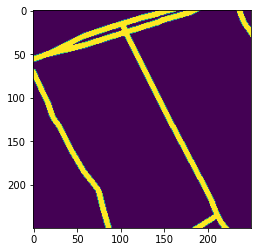

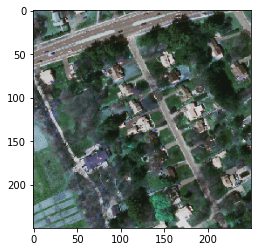

In [141]:
index = random.randint(0,100)
image = cv2.imread(os.path.join(SLICED_IMAGE_DIR, sliced_image_filenames[index]), cv2.IMREAD_UNCHANGED,
)
mask = cv2.imread(os.path.join(SLICED_MASK_DIR, sliced_mask_filenames[index]), cv2.IMREAD_UNCHANGED,
)
print(mask.mean())
plt.imshow(mask)
plt.show()
plt.imshow(image)
plt.show()

In [96]:
len(sliced_image_filenames)

11016

In [75]:
hff_images=[]
hff_masks = []
for mask_fn,image_fn in tqdm(zip(sliced_mask_filenames,sliced_image_filenames)):
    mask = cv2.imread(os.path.join(SLICED_MASK_DIR, mask_fn), cv2.IMREAD_UNCHANGED)
    image = cv2.imread(os.path.join(SLICED_IMAGE_DIR, image_fn), cv2.IMREAD_UNCHANGED)
    if np.mean(mask)>10:
        hff_masks.append(mask_fn)
        hff_images.append(image_fn)

2892it [00:34, 83.55it/s]


In [98]:
import random


5

In [77]:
len(hff_masks)

591

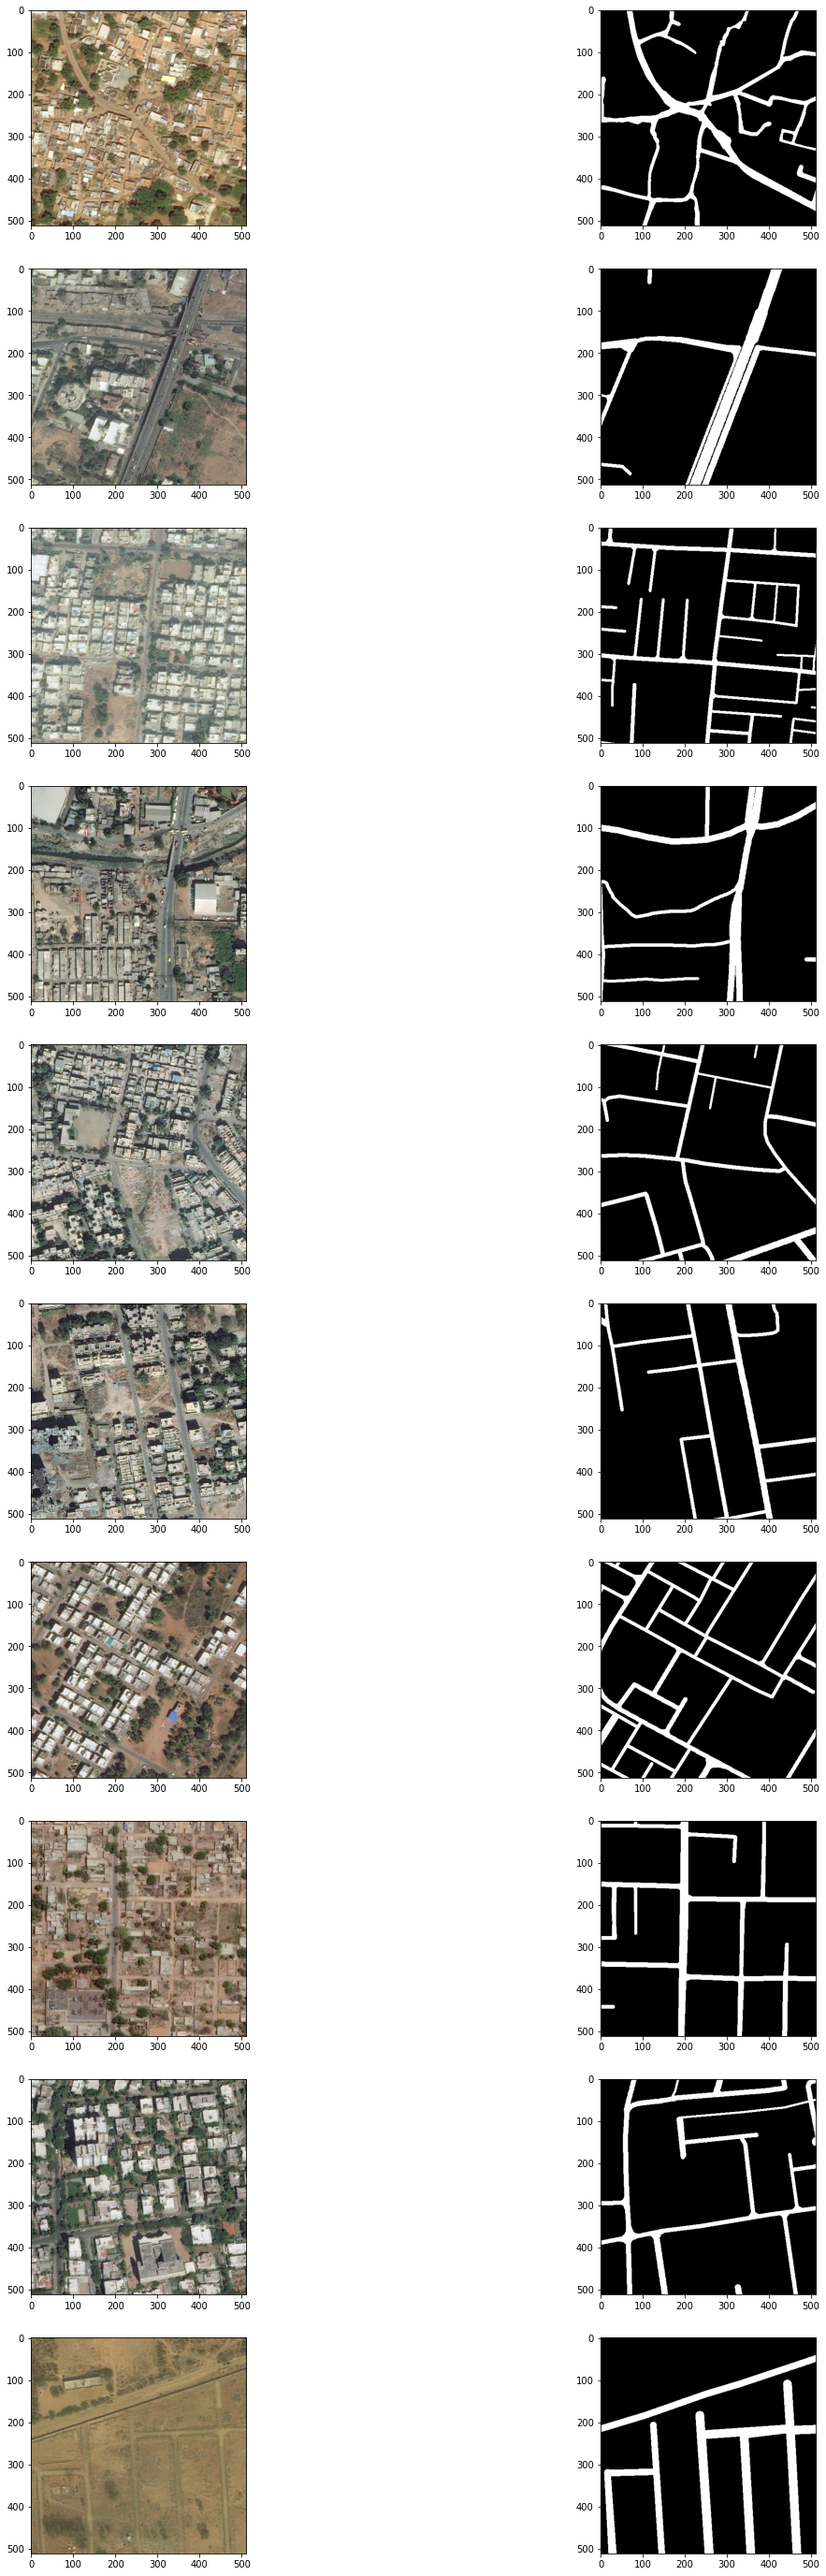

In [118]:
rows=10
cols = 2
fig,axs = plt.subplots(rows,cols,figsize=(20,50),tight_layout=False)
for r in range(rows):
    index=random.randint(0,len(hff_masks))
    image = cv2.imread(os.path.join(SLICED_IMAGE_DIR, hff_images[index]), cv2.IMREAD_UNCHANGED,
    )
    mask = cv2.imread(os.path.join(SLICED_MASK_DIR, hff_masks[index]), cv2.IMREAD_UNCHANGED,
    )
    axs[r,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[r,1].imshow(mask)
plt.show()